<a href="https://colab.research.google.com/github/sayan112207/Email-Marketing-Campaign/blob/main/Email_Campaign_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, confusion_matrix,
                             classification_report)
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [ ]:
email_df = pd.read_csv('/content/email_table.csv')
opened_df = pd.read_csv('/content/email_opened_table.csv')
clicked_df = pd.read_csv('/content/link_clicked_table.csv')

In [ ]:
email_info = email_df.info()
email_head = email_df.head()

opened_info = opened_df.info()
opened_head = opened_df.head()

clicked_info = clicked_df.info()
clicked_head = clicked_df.head()

(email_info, email_head, opened_info, opened_head, clicked_info, clicked_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  10345 non-null  int64
dtypes: int64(1)
memory usage: 80.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 1 columns):
 #   Column    Non-Null Cou

(None,
    email_id   email_text email_version  hour    weekday user_country  \
 0     85120  short_email  personalized     2     Sunday           US   
 1    966622   long_email  personalized    12     Sunday           UK   
 2    777221   long_email  personalized    11  Wednesday           US   
 3    493711  short_email       generic     6     Monday           UK   
 4    106887   long_email       generic    14     Monday           US   
 
    user_past_purchases  
 0                    5  
 1                    2  
 2                    2  
 3                    1  
 4                    6  ,
 None,
    email_id
 0    284534
 1    609056
 2    220820
 3    905936
 4    164034,
 None,
    email_id
 0    609056
 1    870980
 2    935124
 3    158501
 4    177561)

## **Initial Campaign Performance**

In [ ]:
# Merge data to form a unified dataset
email_df['opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)
email_df['clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)

# Calculate open and click rates
total_emails = len(email_df)
opened_emails = email_df['opened'].sum()
clicked_emails = email_df['clicked'].sum()

open_rate = opened_emails / total_emails * 100
click_rate = clicked_emails / total_emails * 100
ctr_among_opened = clicked_emails / opened_emails * 100

(open_rate, click_rate, ctr_among_opened)

(np.float64(10.345), np.float64(2.119), np.float64(20.483325277912034))

In [ ]:
print(f"Email Open Rate: {open_rate}%\nClick Through Rate (CTR): {click_rate}%\nCTR Among Opened: {ctr_among_opened}%")

Email Open Rate: 10.345%
Click Through Rate (CTR): 2.119%
CTR Among Opened: 20.483325277912034%


1. Email Open Rate: 10.35%
   * Out of 100,000 emails sent, ~10,345 were opened.
2. Click-Through Rate (CTR): 2.12%
   * About 2,119 users clicked the link inside the email.
3. CTR Among Opened Emails: 20.48%
   * Among those who opened the email, ~1 in 5 clicked the link.

## **EDA**

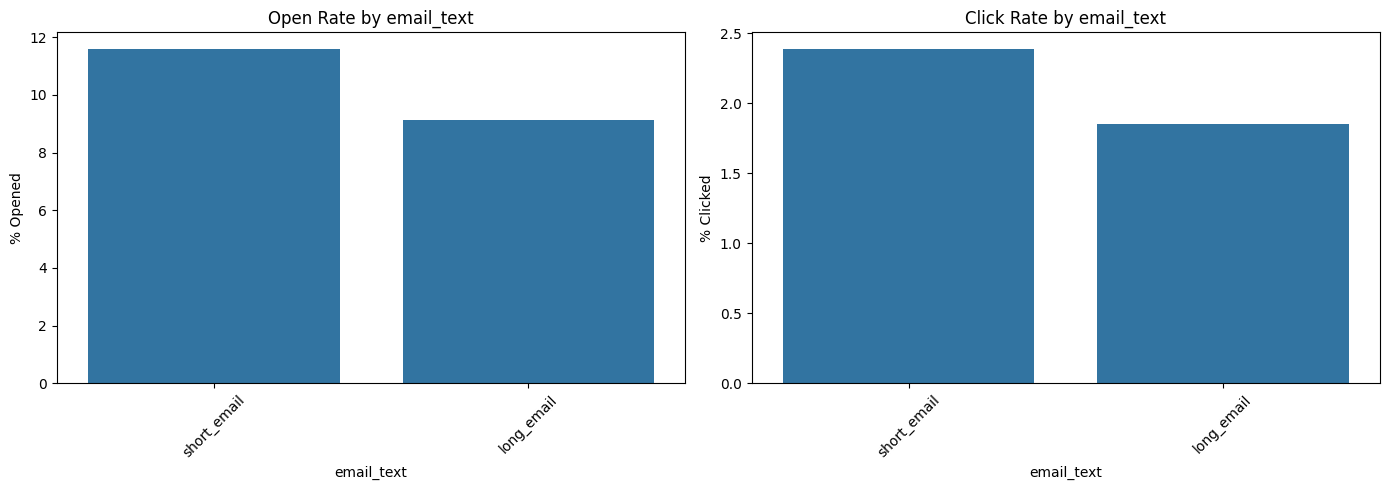

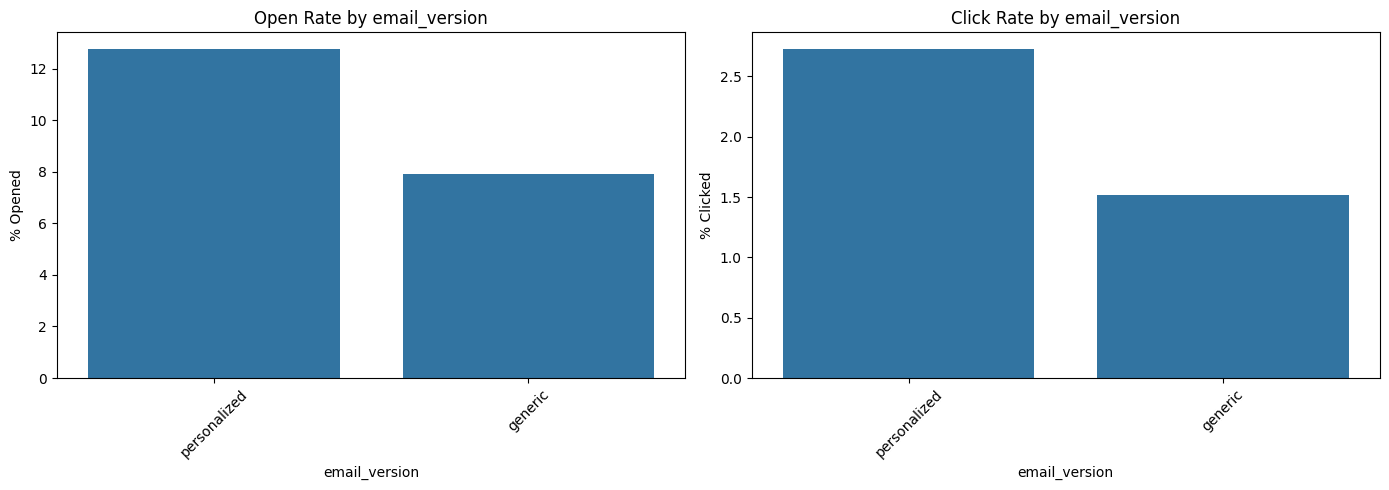

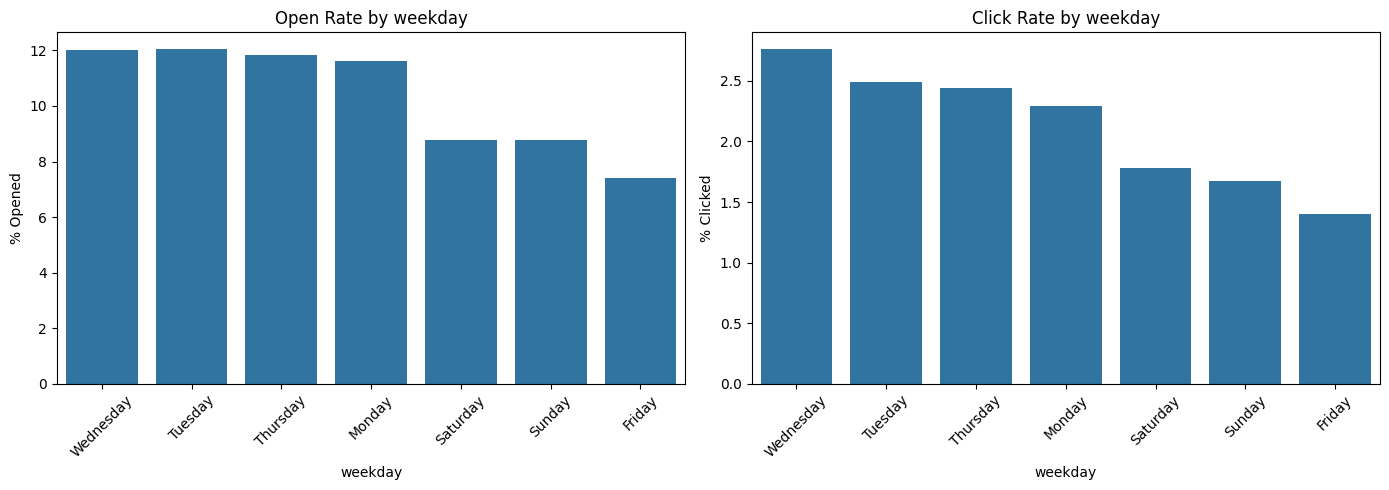

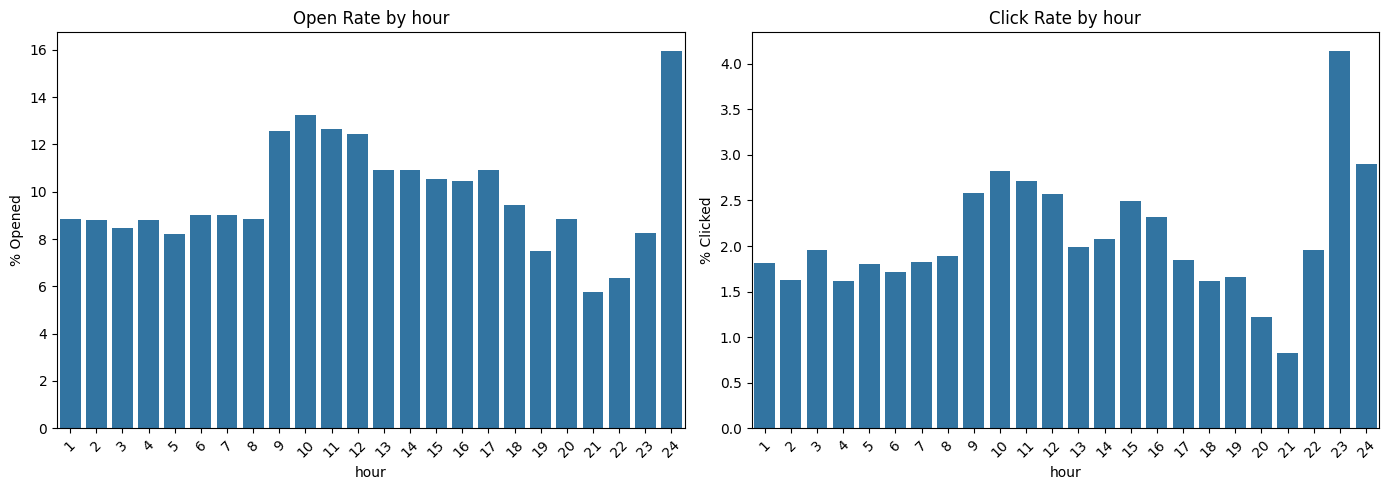

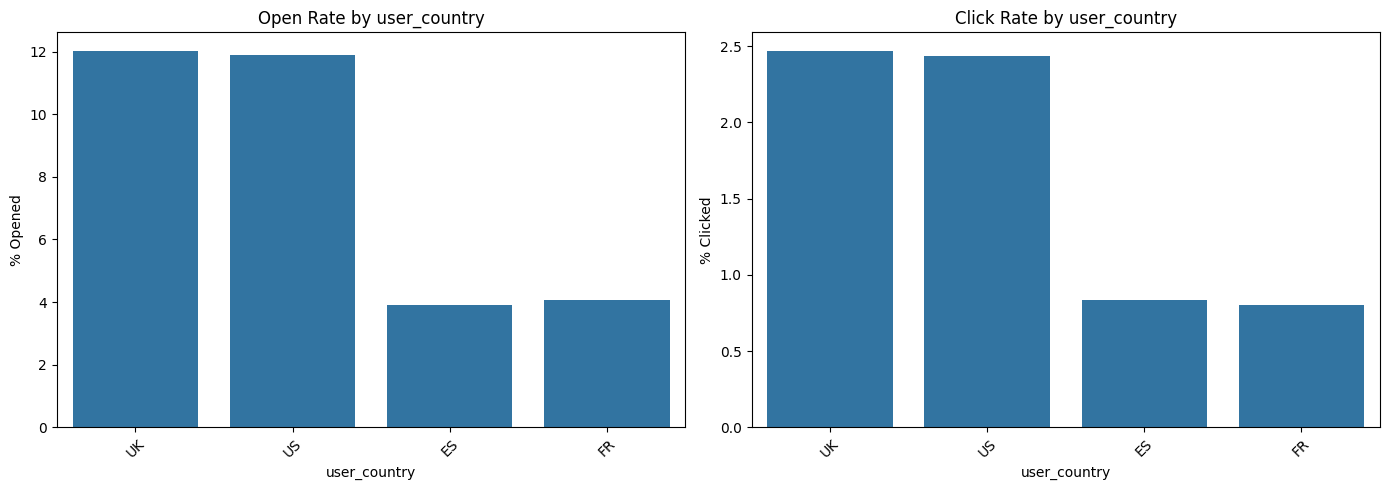

In [ ]:
def plot_open_click_rates(df, feature):
    summary = df.groupby(feature).agg(
        total=('email_id', 'count'),
        opened=('opened', 'sum'),
        clicked=('clicked', 'sum')
    )
    summary['open_rate'] = summary['opened'] / summary['total'] * 100
    summary['click_rate'] = summary['clicked'] / summary['total'] * 100
    summary = summary.sort_values('click_rate', ascending=False)

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    sns.barplot(x=summary.index, y='open_rate', data=summary, ax=ax[0])
    ax[0].set_title(f'Open Rate by {feature}')
    ax[0].set_ylabel('% Opened')
    ax[0].tick_params(axis='x', rotation=45)

    sns.barplot(x=summary.index, y='click_rate', data=summary, ax=ax[1])
    ax[1].set_title(f'Click Rate by {feature}')
    ax[1].set_ylabel('% Clicked')
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Plot open and click rates by various categorical features
plot_open_click_rates(email_df, 'email_text')
plot_open_click_rates(email_df, 'email_version')
plot_open_click_rates(email_df, 'weekday')
plot_open_click_rates(email_df, 'hour')
plot_open_click_rates(email_df, 'user_country')

1. Email Text (Short vs Long)
   * Short emails have slightly higher open and click rates.
   * Simpler content may drive better engagement.

2. Personalization
   * Personalized emails perform better in both opening and clicking.
   * Including the user’s name adds value.

3. Weekday
   * Weekdays like Tuesday and Wednesday show higher engagement.
   * Especially end of week (Friday’s) have lower click rates.

4. Hour of Day
   * Emails sent between 9 AM – 12 PM tend to have the highest click rates.
   * Very early or late emails (e.g., 1 AM or 11 PM) perform poorly.

5. User Country
   * Users in the UK, US have higher engagement than some others.